In [1]:
import pandas as pd
import csv
import matplotlib as plt
import numpy as np
import seaborn as sns

In [2]:
park=pd.read_csv("/Users/kychen/Downloads/park_accidents.csv")
park.head()

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,False,False,False,0,2009
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,True,False,False,"This was the third ejection on this ride, unde...",2009
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),False,False,False,0,2008
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,False,False,False,0,2008
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,False,False,False,0,2008


In [3]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   acc_id                14884 non-null  int64 
 1   acc_date              14884 non-null  object
 2   acc_state             14884 non-null  object
 3   acc_city              14884 non-null  object
 4   fix_port              14884 non-null  object
 5   source                14884 non-null  object
 6   bus_type              14884 non-null  object
 7   industry_sector       14884 non-null  object
 8   device_category       14884 non-null  object
 9   device_type           14884 non-null  object
 10  tradename_or_generic  14884 non-null  object
 11  manufacturer          14884 non-null  object
 12  num_injured           14884 non-null  int64 
 13  age_youngest          14884 non-null  int64 
 14  gender                14884 non-null  object
 15  acc_desc              14884 non-null

In [4]:
park.isnull().any()

acc_id                  False
acc_date                False
acc_state               False
acc_city                False
fix_port                False
source                  False
bus_type                False
industry_sector         False
device_category         False
device_type             False
tradename_or_generic    False
manufacturer            False
num_injured             False
age_youngest            False
gender                  False
acc_desc                False
injury_desc             False
report                  False
category                False
mechanical              False
op_error                False
employee                False
notes                   False
year                    False
dtype: bool

<AxesSubplot:xlabel='age_youngest'>

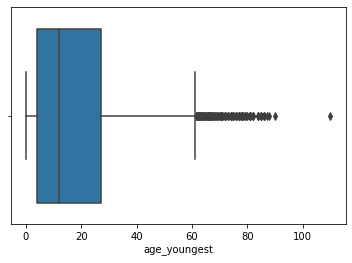

In [5]:

sns.boxplot(x='age_youngest',data=park)

In [6]:
park[["num_injured", "age_youngest"]].describe()

,num_injured,age_youngest
count,14884.000000,14884.000000
mean,1.081295,16.858976
std,2.360132,16.542130
min,0.000000,0.000000
25%,1.000000,4.000000
50%,1.000000,12.000000
75%,1.000000,27.000000
max,99.000000,110.000000


In [7]:
park["num_injured"].value_counts(ascending=True)

33        1
31        1
14        1
17        1
13        1
27        1
18        1
11        2
8         2
12        2
10        3
9         5
6         6
99        8
7         9
5        14
4        29
3        50
2       139
0       309
1     14299
Name: num_injured, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Count'>

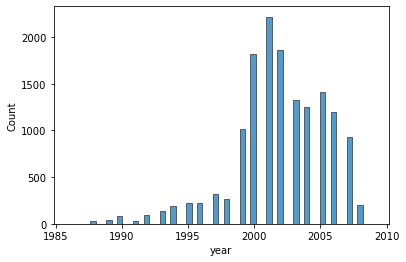

In [8]:
sns.histplot(x='year',data=park)

In [9]:
park.groupby('year').describe()['num_injured']

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1986,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1987,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1988,31.0,1.677419,3.113274,1.0,1.0,1.0,1.0,18.0
1989,40.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1990,84.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1991,31.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1992,92.0,1.065217,0.439889,1.0,1.0,1.0,1.0,5.0
1993,134.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1994,194.0,1.113402,0.732322,1.0,1.0,1.0,1.0,9.0


<AxesSubplot:xlabel='year', ylabel='num_injured'>

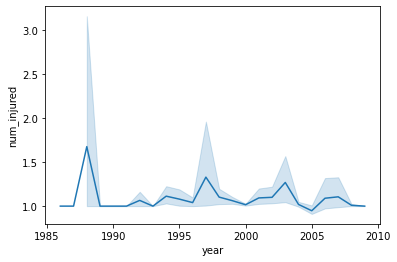

In [10]:
sns.lineplot(x="year",y="num_injured",data=park)

In [11]:
park.groupby('category').describe()['num_injured']

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Abrupt stop/drop/lurch,108.0,2.148148,9.440235,1.0,1.0,1.0,1.0,99.0
Awkward landing,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
Body pain (normal motion),1422.0,1.011252,0.198197,1.0,1.0,1.0,1.0,7.0
Burn (includes friction burn),88.0,1.022727,0.149887,1.0,1.0,1.0,1.0,2.0
"Choking, water inhalation, suffocation",28.0,1.035714,0.188982,1.0,1.0,1.0,1.0,2.0
Collision: go-kart crashed (no further description),14.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Collision: go-kart or bumper car hit stationary object,434.0,1.016129,0.126117,1.0,1.0,1.0,1.0,2.0
Collision: operator-controlled vehicles,142.0,2.633803,8.757148,0.0,1.0,1.0,1.0,99.0
Collision: patron-controlled vehicles,1273.0,1.018068,0.174166,0.0,1.0,1.0,1.0,4.0


In [12]:
park.groupby('bus_type').describe()['num_injured']

,count,mean,std,min,25%,50%,75%,max
bus_type,,,,,,,,
Amusement park,8728.0,1.040215,1.644561,0.0,1.0,1.0,1.0,99.0
Carnival or rental,1094.0,1.606033,6.681021,0.0,1.0,1.0,1.0,99.0
City or county park,8.0,0.875000,0.353553,0.0,1.0,1.0,1.0,1.0
Family entertainment center,1572.0,1.026718,0.385014,0.0,1.0,1.0,1.0,13.0
"Mall, store or restaurant",59.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Other,49.0,1.265306,1.482896,0.0,1.0,1.0,1.0,9.0
Pool waterslide,61.0,0.967213,0.179556,0.0,1.0,1.0,1.0,1.0
Sports or recreation facility,86.0,1.046512,0.261533,1.0,1.0,1.0,1.0,3.0
Unknown,159.0,1.132075,0.721402,0.0,1.0,1.0,1.0,8.0


In [13]:
park.groupby('mechanical').describe()['num_injured']

,count,mean,std,min,25%,50%,75%,max
mechanical,,,,,,,,
False,13949.0,1.032260,1.447471,0.0,1.0,1.0,1.0,99.0
True,935.0,1.812834,7.543184,0.0,0.0,1.0,1.0,99.0


In [14]:
park.groupby('manufacturer').describe()

acc_id                                        \
                          count           mean          std       min   
manufacturer                                                            
0                        2657.0  909747.465939  8070.435842  897352.0   
A.R.M. Inc.                33.0  908978.333333  6618.492179  897630.0   
ABC Rides                   1.0  909367.000000          NaN  909367.0   
Aero-Mar Plastics          96.0  907854.135417  2460.825666  904441.0   
Air-Tech Systems Inc.       9.0  914558.555556   255.697630  914169.0   
...                         ...            ...          ...       ...   
Wisdom Industries, Ltd.   274.0  909396.864964  7998.288588  897353.0   
World Wide Inflatables      1.0  914037.000000          NaN  914037.0   
Zamperla                  396.0  910160.085859  6962.661975  897355.0   
Zierer                    158.0  910161.575949  4748.103052  897712.0   
eInflatables                1.0  916054.000000          NaN  916054.0   

                                                                    \
                               25%       50%        75%        max   
manufacturer                                                         
0                        900995.00  911658.0  916616.00  1008350.0   
A.R.M. Inc.              904559.00  910737.0  914940.00   917018.0   
ABC Rides                909367.00  909367.0  909367.00   909367.0   
Aero-Mar Plastics        905668.75  907193.5  910465.25   914677.0   
Air-Tech Systems Inc.    914335.00  914690.0  914736.00   914799.0   
...                            ...       ...        ...        ...   
Wisdom Industries, Ltd.  906064.00  909764.5  912447.25  1005167.0   
World Wide Inflatables   914037.00  914037.0  914037.00   914037.0   
Zamperla                 906149.75  910387.0  914075.25  1000102.0   
Zierer                   906270.00  910382.5  912302.75   920083.0   
eInflatables             916054.00  916054.0  916054.00   916054.0   

                        num_injured            ... age_youngest          year  \
                              count      mean  ...          75%   max   count   
manufacturer                                   ...                              
0                            2657.0  1.105006  ...        19.00  86.0  2657.0   
A.R.M. Inc.                    33.0  1.060606  ...        13.00  55.0    33.0   
ABC Rides                       1.0  1.000000  ...         0.00   0.0     1.0   
Aero-Mar Plastics              96.0  1.000000  ...        14.00  66.0    96.0   
Air-Tech Systems Inc.           9.0  1.000000  ...        26.00  61.0     9.0   
...                             ...       ...  ...          ...   ...     ...   
Wisdom Industries, Ltd.       274.0  1.514599  ...        12.75  59.0   274.0   
World Wide Inflatables          1.0  1.000000  ...        40.00  40.0     1.0   
Zamperla                      396.0  1.290404  ...        10.00  66.0   396.0   
Zierer                        158.0  1.044304  ...        17.00  66.0   158.0   
eInflatables                    1.0  1.000000  ...        17.00  17.0     1.0   

                                                                        \
                                mean       std     min     25%     50%   
manufacturer                                                             
0                        2002.689876  3.140082  1989.0  2000.0  2003.0   
A.R.M. Inc.              2002.393939  3.141849  1995.0  2000.0  2002.0   
ABC Rides                2001.000000       NaN  2001.0  2001.0  2001.0   
Aero-Mar Plastics        2001.093750  1.086551  1999.0  2000.0  2001.0   
Air-Tech Systems Inc.    2004.777778  0.440959  2004.0  2005.0  2005.0   
...                              ...       ...     ...     ...     ...   
Wisdom Industries, Ltd.  2002.145985  2.763022  1991.0  2000.0  2002.0   
World Wide Inflatables   2004.000000       NaN  2004.0  2004.0  2004.0   
Zamperla                 2002.204545  2.518002  1993.0  2000.0  2002.0  

In [15]:
park["manufacturer"].value_counts(ascending=False)

0                                  2657
In-house                           1157
WhiteWater West Industries Ltd.     764
Intamin AG                          686
Arrow Dynamics                      675
                                   ... 
Top Fun                               1
eInflatables                          1
Moon Walker Sales                     1
Dino Jump Int.                        1
Mollini                               1
Name: manufacturer, Length: 279, dtype: int64

For summary statistics, we check the data first. There is no null value in the dataset. Our summary analusis mainly focuses on the statistics among categorical variables and numerical variables.

Summary 0 is statistics of two numerical variables that we may focus on, which is separately the age of youngest and number of injured. For the number of injured in the accidents, the average is 1.08. From the following table, the majority cases is that one person got injured per accidents. However, there are still severe accidents in the history that caused 99 people injured. 

Summary 1 is number of accidents in yearly trend. The number of accidents started to drastically increase at 2000, which also symbolizes the large-scale business of amusement park. The peak is around 2001. After that the number of accidents decreased in a relatively stable level. By the end of the data(which is 2010), the number of accidents got effective control.

Summary 2 is number of injured in yearly trend. The peak is around 1985-1990. After that the number of injured does have large fluctation around 1996 and 2003. Considered the result of summary 1, there must be severe accidents at 1996 that caused a large amount of people injured. the case in 2003 may be explained by the large-scale business. The technique issue was a severe issue at that time, which may lead to the large group of injured. 

Summary 3 is the classification of various category related to the accidents. It shows that Impact: hit something in participatory attraction, Load/Unload: scrape or stumble, Body pain (normal motion),Impact: hit something within ride vehicle are high frequency categories of accidents. While Collision: operator-controlled vehicles,Abrupt stop/drop/lurch, Derailment	cause larger injuries. 

Summary 4 shows the location where accidents occured. It shows that amusement park and water park leads in the counting of accidents. 

Summary 5 shows that mechnical malfunction factor. As "False" accounts for significantly larger porpotion, it shows that malfunction is not the reason that leads to accidents. 

Summary 6 provides the information of manufacturer. It shows that In-house,WhiteWater West Industries Ltd. and  Intamin AG Arrow Dynamics are corporations that might have servere techniquen issues that result in the accidents.

In [16]:
#Segmentation & Targeting

In [17]:
portland=pd.read_csv("/Users/kychen/Downloads/portland_families.csv")
portland.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,county,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,3,own,3309,80464,1,York,2535,2842,1,No
1,2,3,own,3814,47696,2,York,2913,3938,1,No
2,3,3,rent,2592,108256,2,Cumberland,1986,3687,2,No
3,4,2,own,2628,68064,1,Cumberland,2505,2826,1,No
4,5,3,rent,2442,62786,2,Sagadahoc,3541,1344,2,No


In [18]:
portland=portland.drop(columns=['own_rent', 'county','LL_passholder',"householdID"])

In [19]:
portland.shape

(15000, 7)

In [20]:
x = portland.values
print(x.shape)

(15000, 7)


In [21]:
portland

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
0,3,3309,80464,1,2535,2842,1
1,3,3814,47696,2,2913,3938,1
2,3,2592,108256,2,1986,3687,2
3,2,2628,68064,1,2505,2826,1
4,3,2442,62786,2,3541,1344,2
...,...,...,...,...,...,...,...
14995,5,2802,68606,1,2288,3181,2
14996,3,1906,76967,1,2396,3338,3
14997,3,3510,69617,1,2505,3028,2
14998,3,2555,62405,1,1737,4419,3


In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(portland)
portland_normalized=scaler.transform(portland)
portland_normalized=pd.DataFrame(data=portland_normalized,index=portland.index,columns=portland.columns)
print(portland_normalized.describe().round(3))

       total_ppl  square_foot  household_income  number_pets  \
count  15000.000    15000.000         15000.000    15000.000   
mean       0.000       -0.000             0.000       -0.000   
std        1.000        1.000             1.000        1.000   
min       -2.389       -3.369            -3.505       -1.910   
25%       -0.146       -0.751            -0.669       -0.644   
50%       -0.146       -0.094            -0.002        0.621   
75%        0.976        0.759             0.674        0.621   
max        4.341        3.630             3.882        3.152   

       entertainment_spend_est  travel_spend_est   under_12  
count                15000.000         15000.000  15000.000  
mean                     0.000            -0.000     -0.000  
std                      1.000             1.000      1.000  
min                     -3.208            -4.388     -2.413  
25%                     -0.667            -0.638     -1.047  
50%                     -0.002             0.028   

<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='SSE'>

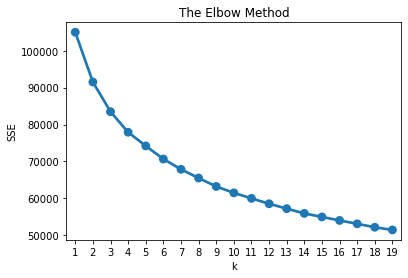

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1000)
    kmeans.fit(portland_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In [24]:
from sklearn.cluster import KMeans

In [25]:
modelY=KMeans(n_clusters=5,random_state=1000)
modelY.fit(portland_normalized)
labels=modelY.predict(portland_normalized)

In [26]:
portlandY=portland_normalized.assign(Cluster=labels)
portlandY.groupby(['Cluster']).agg({'total_ppl':'mean','square_foot':'mean','household_income':'mean','number_pets':'mean','entertainment_spend_est':'mean','travel_spend_est':'mean','under_12':'mean'}).round(1)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
Cluster,,,,,,,
0,0.0,1.0,-0.4,0.1,0.6,0.7,0.2
1,-0.4,0.6,0.8,-0.2,-0.5,0.6,-0.5
2,-0.4,-0.6,-0.2,1.0,-0.0,-0.5,-0.3
3,-0.4,-0.6,-0.3,-0.9,0.0,-0.5,-0.3
4,1.3,-0.3,0.1,-0.0,-0.1,-0.2,0.9


In [27]:
portlandY.groupby(['Cluster']).describe()

total_ppl                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0          2957.0  0.003942  0.803833 -2.389140 -0.145886 -0.145886  0.975741   
1          2783.0 -0.419542  0.811802 -2.389140 -1.267513 -0.145886 -0.145886   
2          3361.0 -0.363137  0.745136 -2.389140 -1.267513 -0.145886 -0.145886   
3          3159.0 -0.373478  0.727602 -2.389140 -1.267513 -0.145886 -0.145886   
4          2740.0  1.297902  0.794688 -1.267513  0.975741  0.975741  2.097368   

                  square_foot            ... travel_spend_est            \
              max       count      mean  ...              75%       max   
Cluster                                  ...                              
0        3.218995      2957.0  1.022957  ...         1.268483  3.921053   
1        2.097368      2783.0  0.563527  ...         1.075917  3.664299   
2        2.097368      3361.0 -0.571365  ...         0.139765  2.987402   
3        2.097368      3159.0 -0.619663  ...         0.063906  1.963720   
4        4.340622      2740.0 -0.261061  ...         0.419861  2.922380   

        under_12                                                              \
           count      mean       std       min       25%       50%       75%   
Cluster                                                                        
0         2957.0  0.244546  0.876228 -2.413141  0.318923  0.318923  0.318923   
1         2783.0 -0.487051  0.898362 -2.413141 -1.047109 -1.047109  0.318923   
2         3361.0 -0.259029  0.862142 -2.413141 -1.047109  0.318923  0.318923   
3         3159.0 -0.262689  0.879256 -2.413141 -1.047109  0.318923  0.318923   
4         2740.0  0.851376  0.912325 -2.413141  0.318923  0.318923  1.684955   

                   
              max  
Cluster            
0        3.050987  
1        3.050987  
2        1.684955  
3        3.050987  
4        3.050987  

[5 rows x 56 columns]

In [28]:
portlandY["Cluster"]=portlandY["Cluster"].astype('category')

<AxesSubplot:xlabel='Cluster', ylabel='Count'>

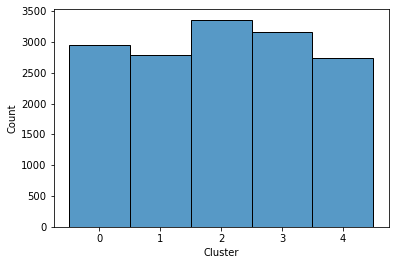

In [29]:
sns.histplot(data=portlandY, x="Cluster")

<AxesSubplot:xlabel='Cluster', ylabel='household_income'>

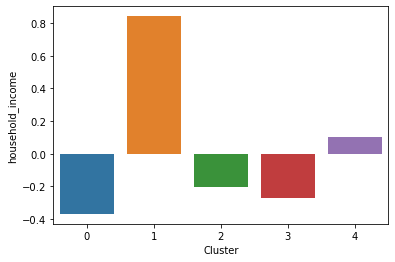

In [30]:
sns.barplot(x="Cluster",y="household_income",ci=None,data=portlandY)

<AxesSubplot:xlabel='Cluster', ylabel='entertainment_spend_est'>

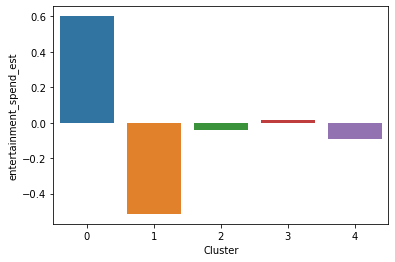

In [31]:
sns.barplot(x="Cluster",y="entertainment_spend_est",ci=None,data=portlandY)

<AxesSubplot:xlabel='Cluster', ylabel='travel_spend_est'>

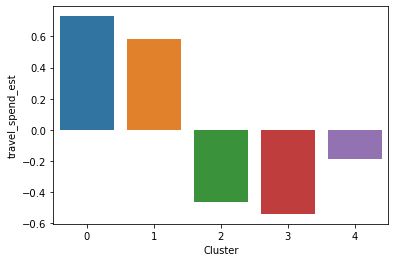

In [32]:
sns.barplot(x="Cluster",y="travel_spend_est",ci=None,data=portlandY)

<AxesSubplot:xlabel='Cluster', ylabel='square_foot'>

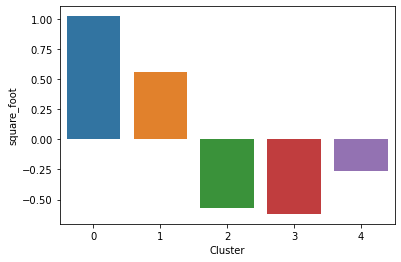

In [33]:
sns.barplot(x="Cluster",y="square_foot",ci=None,data=portlandY)

<AxesSubplot:xlabel='Cluster', ylabel='total_ppl'>

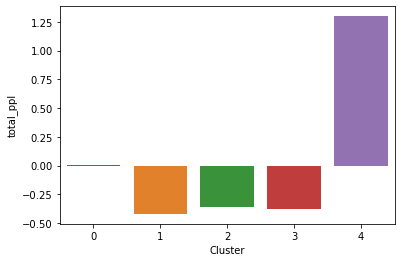

In [34]:
sns.barplot(x="Cluster",y="total_ppl",ci=None,data=portlandY)

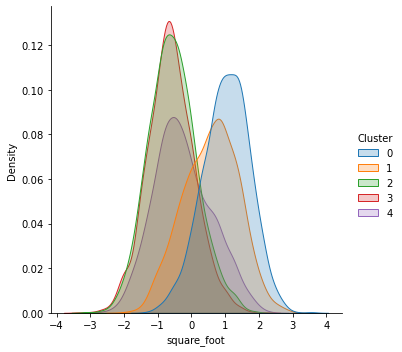

In [35]:
sns.displot(x="square_foot",hue='Cluster',kind='kde',data=portlandY,fill=True)

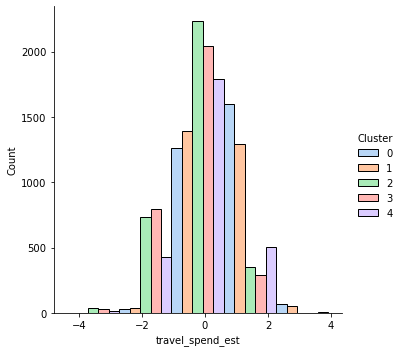

In [36]:
sns.displot(x="travel_spend_est",hue="Cluster",bins=5,palette='pastel',multiple='dodge',data=portlandY)

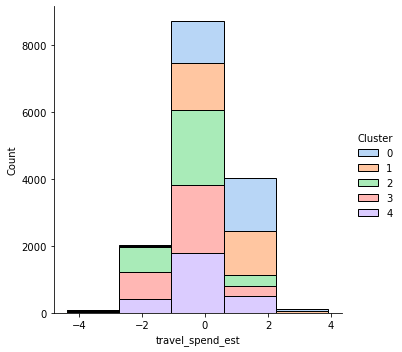

In [37]:
sns.displot(x="travel_spend_est",hue="Cluster",bins=5,palette='pastel',multiple='stack',data=portlandY)

For data portland(n_cluster=5, random_state=1000), 


Cluster 0 are "paycheck-paycheck". They dont have so much income and they are willing to spend money on living expense, travel and entertainments cost. It seems that their consuming behaviors are high. As the total_ppl is average, they might have children under 12 and pets. (2-3 people +1-2 pet in a large house)

Cluster 1 are "rich-rich". They are very wealthy. They tend to invest large amount of money on travel rather than entertainment. They may live individually in a relatively large home because of the lowest total_ppl and high square_foot. They are less likely to have pets(1-2 people in a house+ 0-1 pet in a relatively large house)


Cluster 2 is "pet-pet". Their income is around average level in all of the clusters. They might live individually in small house. They may live individually because of the lowest total_ppl variable. Their consuming behaviors are also average on entertainment and travel. They are likely to have pets and have no children under 12 (1-2 people, tend to be 1 person+2-3 pet in a very small house)


Cluster 3 is “home-home”. Their salary is relatively low. They dont even spend money on travel and the cost of entertainment is just average level. They may live individually in a very small house because of the lowest total_ppl variable. They are almost unlikely to have pets and less likely to have children under 12. (1-2 people+0-1 pet in a very small house)


Cluster 4 are "family-family". They have above-average income and below-average consuming behaviors.The family is largest and children under 12 are the highest in all the clusters. They are likely to have 2-3 children under 12. (5+ people in a below average size house+1-2 pets)

For park management, cluster 0 might be the most important group. They are willing to spend buttload of money on entertainment and travel. They also are likely to have kids. As long as lobster lands are kid-friendly/pet friendly and provide excellent service(restaurant,hotel,free parking lot,bar,etc.) and entertainment programs, We certainly believe that cluster 0 will be the largest group of vistors in all of the 5 clusters. They are safe choice of park management. 

Cluster 1 might be tough because they tend to invest large amount of money on travel rather than entertainment. They are wealthy and live individually so coupons and group discount may not work well with them. We may suggest the park management improve the quality of natural scene in the lobsterland so that it may attract people in cluster 1 for a short journey. They might be the reach goal of park management.

Cluster 2 has avearge level income and consuming behaviors. Additionally, they may have a lot of pets. How about a large pet garden in the lobsterland. It definitely can arouse their attention-and their petts would love it. They are the reach goal of park management.

Cluster 3 is extremely tough. They tend to stay at home. We would say that cluster 3 will not be target goal of park management. For cluster 3, It might be a good idea to send coupons and invest money on advertisement via social media.

Cluster 4 would be the reach goal of park management. Even though they have below-average consuming behaviors, they are more likely to have large number of children and pets. We suggest group coupon of tickets/service and kid-friendly entertainment programs


In [38]:
#part 3

In [39]:
bbq=pd.read_csv("/Users/kychen/Downloads/bbq_lake.csv")
bbq.head()

,bundleID,starter,maindishI,maindishII,side,dessert,avg_rating
0,1,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Peach Cobbler,5.47
1,2,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Apple Pie a la Mode,7.88
2,3,Fried Chicken Tenders,BBQ Brisket,Sausage,Mashed Potato,Peach Cobbler,6.20
3,4,Fried Chicken Tenders,BBQ Brisket,Sausage,Mashed Potato,Apple Pie a la Mode,8.00
4,5,Fried Chicken Tenders,BBQ Brisket,Sausage,French Fry Platter,Peach Cobbler,8.24


In [40]:
vendor=pd.read_csv("/Users/kychen/Downloads/vendor_costs.csv")
vendor.head()

,Item,Item Category,Cost Per Serving (Dollars)
0,Fried Chicken Tenders,Starters,3.4
1,Crabcakes and Shrimp,Starters,3.5
2,Sticky Chicken Tenders,Starters,2.9
3,Jumbo Shrimp,Starters,4.6
4,BBQ Brisket,Main Dish I,5.7


In [41]:
bbq.isnull().values.any()

False

In [42]:
bbq

,bundleID,starter,maindishI,maindishII,side,dessert,avg_rating
0,1,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Peach Cobbler,5.47
1,2,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Apple Pie a la Mode,7.88
2,3,Fried Chicken Tenders,BBQ Brisket,Sausage,Mashed Potato,Peach Cobbler,6.20
3,4,Fried Chicken Tenders,BBQ Brisket,Sausage,Mashed Potato,Apple Pie a la Mode,8.00
4,5,Fried Chicken Tenders,BBQ Brisket,Sausage,French Fry Platter,Peach Cobbler,8.24
...,...,...,...,...,...,...,...
379,380,Jumbo Shrimp Cocktail,Pork and Brisket Combo,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,4.66
380,381,Jumbo Shrimp Cocktail,Pork and Brisket Combo,Steak Sampler,Mashed Potato,Peach Cobbler,6.10
381,382,Jumbo Shrimp Cocktail,Pork and Brisket Combo,Steak Sampler,Mashed Potato,Apple Pie a la Mode,6.74
382,383,Jumbo Shrimp Cocktail,Pork and Brisket Combo,Steak Sampler,French Fry Platter,Peach Cobbler,8.47


In [43]:
bbq.sort_values(by="avg_rating",ascending=False)

,bundleID,starter,maindishI,maindishII,side,dessert,avg_rating
221,222,Sticky Chicken Tenders,Pulled Pork,Sausage,French Fry Platter,Apple Pie a la Mode,10.16
47,48,Fried Chicken Tenders,Pulled Pork,Steak Sampler,French Fry Platter,Apple Pie a la Mode,9.97
223,224,Sticky Chicken Tenders,Pulled Pork,Fajita,Mac and Cheese,Apple Pie a la Mode,9.96
75,76,Fried Chicken Tenders,Pork and Brisket Combo,Sausage,Mashed Potato,Apple Pie a la Mode,9.93
40,41,Fried Chicken Tenders,Pulled Pork,Beef Short Rib,French Fry Platter,Peach Cobbler,9.93
...,...,...,...,...,...,...,...
293,294,Jumbo Shrimp Cocktail,BBQ Brisket,Sausage,French Fry Platter,Apple Pie a la Mode,3.24
353,354,Jumbo Shrimp Cocktail,BBQ Chicken,Beef Short Rib,French Fry Platter,Apple Pie a la Mode,3.20
93,94,Fried Chicken Tenders,Pork and Brisket Combo,Steak Sampler,Mashed Potato,Apple Pie a la Mode,3.12
76,77,Fried Chicken Tenders,Pork and Brisket Combo,Sausage,French Fry Platter,Peach Cobbler,2.63


In [44]:
bbqs2=pd.get_dummies(bbq,drop_first=True,columns=['starter','maindishI','maindishII','side','dessert'])

In [45]:
bbqs2.head()

,bundleID,avg_rating,starter_Fried Chicken Tenders,starter_Jumbo Shrimp Cocktail,starter_Sticky Chicken Tenders,maindishI_BBQ Chicken,maindishI_Pork and Brisket Combo,maindishI_Pulled Pork,maindishII_Fajita,maindishII_Sausage,maindishII_Steak Sampler,side_Mac and Cheese,side_Mashed Potato,dessert_Peach Cobbler
0,1,5.47,1,0,0,0,0,0,0,1,0,1,0,1
1,2,7.88,1,0,0,0,0,0,0,1,0,1,0,0
2,3,6.20,1,0,0,0,0,0,0,1,0,0,1,1
3,4,8.00,1,0,0,0,0,0,0,1,0,0,1,0
4,5,8.24,1,0,0,0,0,0,0,1,0,0,0,1


In [46]:
bbqs2.columns

Index(['bundleID', 'avg_rating', 'starter_Fried Chicken Tenders',
       'starter_Jumbo Shrimp Cocktail', 'starter_Sticky Chicken Tenders',
       'maindishI_BBQ Chicken', 'maindishI_Pork and Brisket Combo',
       'maindishI_Pulled Pork', 'maindishII_Fajita', 'maindishII_Sausage',
       'maindishII_Steak Sampler', 'side_Mac and Cheese', 'side_Mashed Potato',
       'dessert_Peach Cobbler'],
      dtype='object')

In [47]:
X=bbqs2[['starter_Fried Chicken Tenders','starter_Jumbo Shrimp Cocktail',
         'starter_Sticky Chicken Tenders','maindishI_BBQ Chicken',
         'maindishI_Pork and Brisket Combo', 'maindishI_Pulled Pork','maindishII_Fajita',
         'maindishII_Sausage','maindishII_Steak Sampler', 'side_Mac and Cheese', 'side_Mashed Potato',
       'dessert_Peach Cobbler']]

y=bbqs2['avg_rating']

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [49]:
regressor.intercept_

6.3774999999999995

In [50]:
coef_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
starter_Fried Chicken Tenders,0.100521
starter_Jumbo Shrimp Cocktail,-0.123229
starter_Sticky Chicken Tenders,0.058750
maindishI_BBQ Chicken,-0.223542
maindishI_Pork and Brisket Combo,0.581979
maindishI_Pulled Pork,0.608438
maindishII_Fajita,0.038438
maindishII_Sausage,0.393125
maindishII_Steak Sampler,0.232813
side_Mac and Cheese,0.117344


In [51]:
bbqs6=bbq.sort_values(by=['avg_rating'])

In [52]:
bbqs6

,bundleID,starter,maindishI,maindishII,side,dessert,avg_rating
64,65,Fried Chicken Tenders,BBQ Chicken,Beef Short Rib,French Fry Platter,Peach Cobbler,1.69
76,77,Fried Chicken Tenders,Pork and Brisket Combo,Sausage,French Fry Platter,Peach Cobbler,2.63
93,94,Fried Chicken Tenders,Pork and Brisket Combo,Steak Sampler,Mashed Potato,Apple Pie a la Mode,3.12
353,354,Jumbo Shrimp Cocktail,BBQ Chicken,Beef Short Rib,French Fry Platter,Apple Pie a la Mode,3.20
293,294,Jumbo Shrimp Cocktail,BBQ Brisket,Sausage,French Fry Platter,Apple Pie a la Mode,3.24
...,...,...,...,...,...,...,...
40,41,Fried Chicken Tenders,Pulled Pork,Beef Short Rib,French Fry Platter,Peach Cobbler,9.93
75,76,Fried Chicken Tenders,Pork and Brisket Combo,Sausage,Mashed Potato,Apple Pie a la Mode,9.93
223,224,Sticky Chicken Tenders,Pulled Pork,Fajita,Mac and Cheese,Apple Pie a la Mode,9.96
47,48,Fried Chicken Tenders,Pulled Pork,Steak Sampler,French Fry Platter,Apple Pie a la Mode,9.97


In [53]:
vendor=pd.read_csv("/Users/kychen/Downloads/vendor_costs.csv")


In [54]:
vendor

,Item,Item Category,Cost Per Serving (Dollars)
0,Fried Chicken Tenders,Starters,3.40
1,Crabcakes and Shrimp,Starters,3.50
2,Sticky Chicken Tenders,Starters,2.90
3,Jumbo Shrimp,Starters,4.60
4,BBQ Brisket,Main Dish I,5.70
5,Pulled Pork,Main Dish I,6.00
6,BBQ Chicken,Main Dish I,5.30
7,Pork & Brisket Combo,Main Dish I,6.10
8,Sausage,Main Dish II,5.30
9,Fajita,Main Dish II,4.70


We construct a theoretical value for the bundle: Intercept+starter_partworth+maindish1_partworth+maindish2_partworth+side_partworth+dessert_partworth
	
Based on the conjoint analysis, the winner for highest weight of rating score will be starter_Fried Chicken Tenders,maindishI_Pulled Pork, maindishII_Sausage,side_Mac and Cheese and dessert_Apple Pie a la Mode. The cost  will be 15+3.4+6+5.3+0.2+0.7=30.6, 

Starter:
The respondants prefer starter_Fried Chicken Tenders above all the other options. It is also the most worthy one because the jumbo shrimp has the most expensive cost and most negative feedback. Sticky chicken tender would decrease 0.05 weight on performance but it has 0.5 cost reduction. So We would recommend fried chicken tenders priorly and sticky chicken tender as back-up option.

Maindish1:
The respondants prefer pulled pork above all the other options. It is also the most worthy one because the Pork & Brisket Combo is more expensive and relatively lower performance than pulled pork. We dont even consider the bbq chicken because it is really bad. As the weight of Pulled Pork is high enough to affect the overall grade, we strongly recommend pulled pork as main dish 1. There is no back-up option at this case.

Maindish2:
The respondants prefer Sausage above all the other options. The cost of sausage is also fair. We dont recommend the beef short ribs as its weight is the least in maindish 2 and the cost is the most expensive. steak sampler can be recommended as back-up option because of the lower cost, while the performance does not be affected so much (-0.16)

Side:
Mac and cheese is preferred. We may also regard mashed_potato as back-up option because of the larger difference of cost. 

Dessert:
We dont consider the peach cobbler because of its low performance while the cost between two option does not show large difference. 

All the analysis conducted there is for the potential benefit. We analyze the park accidents data to figure out how park accidents affect the lobsterland. By tracking the yearly trend of aaccidents and injury performance and groupby counting, the lobsterland will realize the potential danger and quality of manufacturer. The analysis can help them take measures in specific locations and make business decisions to effectively avoid the hurt. 

Segmentation and targeting helps the lobsterland figure out the customers' insight. The clustering analysis categorizes the customers with various characteristics. The lobsterland can work different stradegy on various group to effectively attract them.

Conjoint analysis shows the performance of restaurant order. It is important for the restaurant to reduce its cost while maintaining in a high level rating performance. The conjoint analysis helps them recognizes each factor in the business and effectively recommend order combination to control the cost while keeping the high rating performance. 